Падалко Богдан.
Задание №5 - Классификация методом K-средних. K = 2 (два класса).

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
random_seed = 42
np.random.seed(random_seed)
limit_to_2D = True

In [2]:
iris = datasets.load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
df_original = pd.DataFrame(X, columns = iris.feature_names)
df_original['species'] = iris.target
if limit_to_2D:
    df_original.drop(df_original.columns[np.random.randint(len(df_original.columns)-1)], axis = 1, inplace = True)
    df_original.drop(df_original.columns[np.random.randint(len(df_original.columns)-1)], axis = 1, inplace = True)
display(df_original)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


In [3]:
df = df_original.copy()
df['species'].replace(to_replace = [0, 1, 2], value = [0, 1, 1], inplace = True)
display(df)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,1
146,2.5,1.9,1
147,3.0,2.0,1
148,3.4,2.3,1


In [4]:
x = df.drop('species', axis = 1).values.astype(float)
y = df['species'].values

In [5]:
x_center = df.sample(2, random_state = random_seed).values.astype(float)
x_center = x_center[x_center[:, -1].argsort()]
print(x_center)

[[3.8 0.3 0. ]
 [2.8 1.2 1. ]]


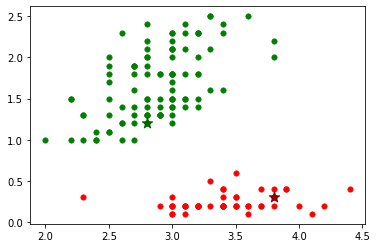

In [6]:
for i in range(x.shape[0]):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red')
    else:
        plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green')
plt.scatter(x_center[0][0], x_center[0][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkred')
plt.scatter(x_center[1][0], x_center[1][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkgreen')

In [7]:
def dist_to_center(point, center):
    return np.linalg.norm(point-center)

In [8]:
def assign_point_clusters(x, centers):
    new_x = x.copy()
    for i in range(0, new_x.shape[0]):
        possible_centers = [dist_to_center(new_x[i][0:-1], center) for center in centers]
        new_x[i][-1] = possible_centers.index(min(possible_centers))
    return new_x

In [9]:
max_iterations = 100
eps = 0.001

In [10]:
def KMeans_Classification(x, centers):
    i = 0
    while i < max_iterations:
        i += 1
        x = assign_point_clusters(x, centers)
        new_centers = np.zeros(centers.shape)
        for j in range(0, centers.shape[0]):
            s = np.zeros(centers[j].shape)
            n = 0
            for k in range(0, x.shape[0]):
                if x[k][-1] == j:
                    n += 1
                    s += x[k][0:-1]
            s /= n
            new_centers[j] = s
        if np.linalg.norm(new_centers-centers) <= eps:
            break
        centers = new_centers.copy()
    print("Пройдено итераций: "+str(i)+".")
    return x, centers

Пройдено итераций: 3.
Точность кластеризации: 100%.


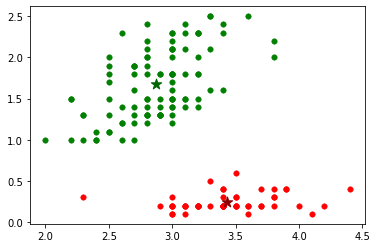

In [11]:
x_center = np.delete(x_center, -1, axis = 1)
x = np.append(x, np.zeros((x.shape[0], 1)), axis = 1)
x_new, x_center_new = KMeans_Classification(x, x_center)
for i in range(x_new.shape[0]):
    if x_new[i][-1] == 0:
        plt.scatter(x_new[i][0], x_new[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red')
    else:
        plt.scatter(x_new[i][0], x_new[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green')
plt.scatter(x_center_new[0][0], x_center_new[0][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkred')
plt.scatter(x_center_new[1][0], x_center_new[1][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkgreen')
print("Точность кластеризации: "+str(int(accuracy_score(y, x_new[:, -1])*100))+"%.")

Задание №6 - Классификация методом K-средних. K = 3 (три класса).

In [12]:
df = df_original.copy()
display(df)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


In [13]:
x = df.drop('species', axis = 1).values.astype(float)
y = df['species'].values

In [14]:
x_center = df.sample(3, random_state = random_seed).values.astype(float)
x_center = x_center[x_center[:, -1].argsort()]
print(x_center)

[[3.8 0.3 0. ]
 [2.8 1.2 1. ]
 [2.6 2.3 2. ]]


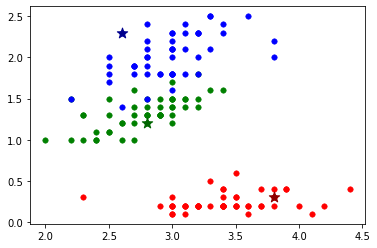

In [15]:
for i in range(x.shape[0]):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red')
    elif y[i] == 1:
        plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green')
    else:
        plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue')
plt.scatter(x_center[0][0], x_center[0][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkred')
plt.scatter(x_center[1][0], x_center[1][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkgreen')
plt.scatter(x_center[2][0], x_center[2][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkblue')

Пройдено итераций: 5.
Точность кластеризации: 92%.


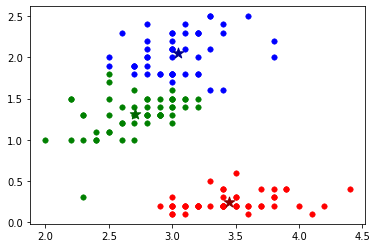

In [16]:
x_center = np.delete(x_center, -1, axis = 1)
x = np.append(x, np.zeros((x.shape[0], 1)), axis = 1)
x_new, x_center_new = KMeans_Classification(x, x_center)
for i in range(x_new.shape[0]):
    if x_new[i][-1] == 0:
        plt.scatter(x_new[i][0], x_new[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red')
    elif x_new[i][-1] == 1:
        plt.scatter(x_new[i][0], x_new[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green')
    else:
        plt.scatter(x_new[i][0], x_new[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue')
plt.scatter(x_center_new[0][0], x_center_new[0][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkred')
plt.scatter(x_center_new[1][0], x_center_new[1][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkgreen')
plt.scatter(x_center_new[2][0], x_center_new[2][1], s = 120, marker = '*', linewidths = 1.0, color = 'darkblue')
print("Точность кластеризации: "+str(int(accuracy_score(y, x_new[:, -1])*100))+"%.")